## 奇异值分解 SVD(Singular Value Decomposition)
### 原理
- 矩阵分解：将原始矩阵表示成两个或多个矩阵乘积的形式，使得易于处理(类比代数因子分解)。
- 奇异值分解(SVD)是矩阵分解方法的一种：
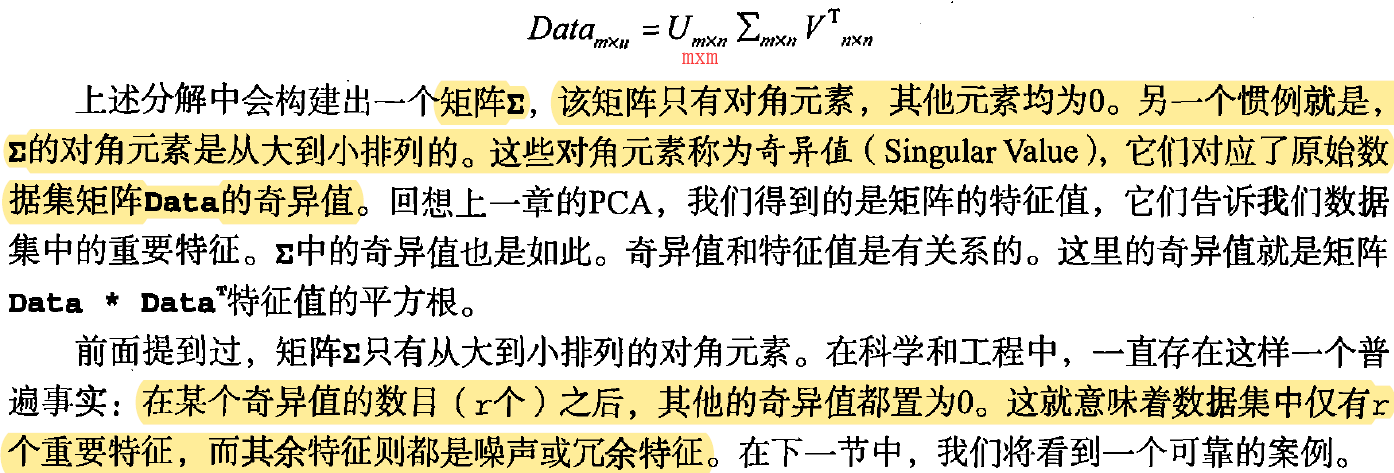
- 奇异值 v,s. 特征值： 奇异值i=根号(特征值i)
    - 因此，可以通过不同个数的奇异值平方之和占比总奇异值平方和，来决定保留几个奇异值
- **原理讲解好文：https://www.cnblogs.com/lzllovesyl/p/5243370.html**
    
### 优缺点
- 优点；简化数据，去除噪声，提高算法效果
- 缺点：数据的转换可能难以理解(分解出的矩阵解释性往往不强，有点黑盒子的味道)
- 适用数据类型：数值型

### 应用
1. 信息检索——隐性语义索引(LSI)/隐性语义分析(LSA)
    - 原理：一个矩阵由文档和词语组成，在该矩阵上应用SVD，会构建出多个奇异值，这些奇异值代表了文档中的概念或主题。这一特点可以更高效地检索文档。
2. 推荐系统
    - 原理：简单地推荐系统能计算项与项之间的相似度，更先进的方法是先利用SVD从数据中构建一个主题空间，然后在该空间下计算相似度。
3. 图像压缩
    - 原理：图像可以转换为数值矩阵，SVD压缩图像就是对图像矩阵做奇异值分解，保留n%信息量的奇异值矩阵，再U\[:,:k\]\*SigmaK\*VT\[:k,:\]乘回去得到压缩后的图像矩阵

### PCA v.s SVD
- PCA基于特征值分解，特征值分解是针对对角矩阵的，因此需要构造特征之间的协方差矩阵来进行特征值分解，当数据较大时效率低；而SVD是奇异值分解，更通用，对于任意形状的矩阵都可以进行分解，效率更高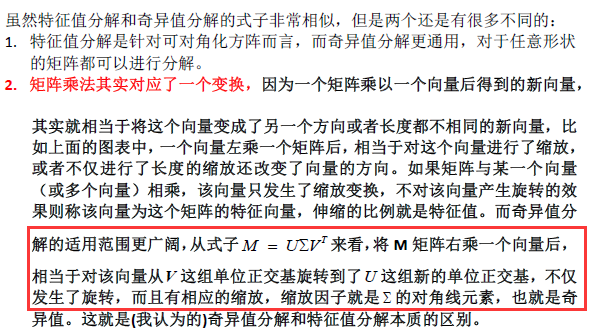

- <font size=4 color=red>由上，知，如何将原始数据转换到低维空间：xformedData=dataMat.T\*U\[:,:k\]\*sigmaK.I</font>

In [1]:
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#设置不显示warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

### 1. SVD初步探索

In [6]:
linalg.svd([[0,1],[1,1],[1,0]])

(array([[-4.08248290e-01,  7.07106781e-01,  5.77350269e-01],
        [-8.16496581e-01,  5.55111512e-17, -5.77350269e-01],
        [-4.08248290e-01, -7.07106781e-01,  5.77350269e-01]]),
 array([1.73205081, 1.        ]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

In [91]:
def loadExData():
    return mat([[0, 0, 0, 2, 2],
           [0, 0, 0, 3, 3],
           [0, 0, 0, 1, 1],
           [1, 1, 1, 0, 0],
           [2, 2, 2, 0, 0],
           [5, 5, 5, 0, 0],
           [1, 1, 1, 0, 0]])

In [92]:
dataMat1=loadExData()
U1,sigma1,VT1=linalg.svd(dataMat1)
sigma1

array([9.64365076e+00, 5.29150262e+00, 6.49628424e-16, 1.43063514e-16,
       2.79192092e-17])

- <font size=3>看到，5个奇异值中后三个都接近于0，于是我们可以去掉后三个奇异值，从而简化数据</font>
    - 可以通过不同个数的奇异值平方之和占比总奇异值平方和，来决定保留几个奇异值
- <font size=3>简化数据：用三个更小的矩阵来对原始矩阵进行近似，这三个矩阵的维度更小，且相乘之后得到的矩阵各元素近似等于原矩阵</font>
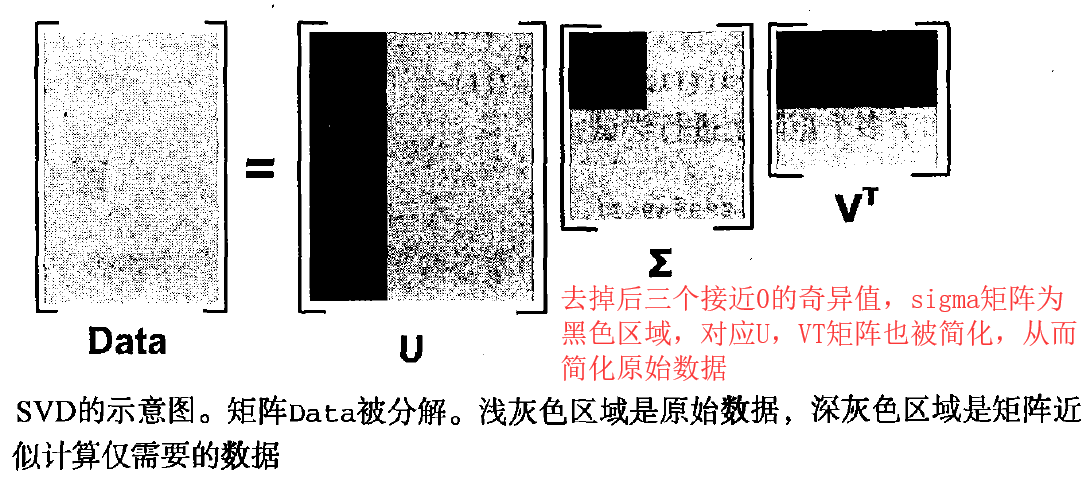

In [137]:
sigma1_2=mat([[sigma1[0],0],[0,sigma1[1]]]) #也可用eye()矩阵与sigma1数组相乘得到sigma1矩阵
print (sigma1_2,'\n',sigma1_2.I)

[[9.64365076 0.        ]
 [0.         5.29150262]] 
 [[0.10369517 0.        ]
 [0.         0.18898224]]


In [22]:
#相乘之后得到的矩阵各元素近似等于原矩阵
dataMat1_2=U1[:,:2]*sigma1_2*VT1[:2,:]
dataMat1_2

matrix([[ 1.76986622e-17, -7.05283417e-16, -7.05283417e-16,
          2.00000000e+00,  2.00000000e+00],
        [ 7.22982080e-16, -3.61491040e-16, -3.61491040e-16,
          3.00000000e+00,  3.00000000e+00],
        [ 2.40994027e-16, -1.20497013e-16, -1.20497013e-16,
          1.00000000e+00,  1.00000000e+00],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         -1.70292592e-16, -1.70292592e-16],
        [ 2.00000000e+00,  2.00000000e+00,  2.00000000e+00,
         -2.45454840e-16, -2.45454840e-16],
        [ 5.00000000e+00,  5.00000000e+00,  5.00000000e+00,
         -5.55011948e-18, -5.55011948e-18],
        [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         -1.22727420e-16, -1.22727420e-16]])

### 2. SVD应用--基于协同过滤的推荐引擎
#### 协同过滤
- 通过将用户和其他用户的评分数据进行比较实现推荐
- 不关心物品的描述属性(如汉堡描述属性：高热量，碳水化合物等等)，**不使用物品的客观描述属性而使用用户对物品的意见来计算相似度**

#### 相似度
- 详见《统计学习方法总结-距离度量》
- 欧式距离：linalg.norm()
- 皮尔逊相关系数:corrcoef()
- 余弦距离: cos(theta)=(inA\*inB)/(linalg.norm(inA)\*linalg.norm(inB))
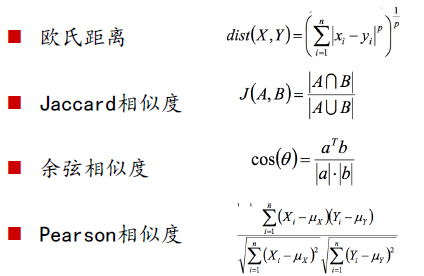

#### 过程
1. SVD去除数据噪声
2. 遍历该用户已评分物品j，利用其他对物品j和item都评分的用户的评分，计算物品j和item的相似度
3. 将相似度\*该用户评分求和再除以simTotal归一化，得到针对该用户的物品item的推荐程度数值(值越大说明越推荐)

#### 面临的问题
- 对于较大数据集，每次推荐都做SVD是很耗资源的，因此SVD一般在调入数据时运行一次，有的大型系统每天运行一次SVD或更低频
- **冷启动问题：如何在缺乏数据时给出好的推荐？-->解法：将推荐问题看作搜索问题。需要物品的客观描述属性来标记物品，从而计算相似度，这种又叫做“基于内容的推荐”**

**以下按照列(即物品)计算相似度，没有按用户计算相似度是因为推荐系统中，用户数往往大于物品数，计算物品相似度更加节省时间和空间**

In [39]:
#三种相似度度量
def ecludSim(inA,inB):
    return 1.0/(1.0+linalg.norm(inA-inB)) #linalg.norm(inA-inB)为欧式距离，通过公式变换，将欧式距离相似度范围限制在[0,1]，且相似度越高，值越大

def pearsSim(inA,inB):
    if len(inA)<3:
        return 1.0 #若不存在3个及以上的点，则返回1，表示两个向量完全相关(根据相关系数公式，当向量少于3个点时，计算为1)
    return 0.5+0.5*corrcoef(inA,inB,rowvar=0)[0][1] #rowvar=0将AB列作为样本，公式变换将相似度范围限制在[0,1]

def cosSim(inA,inB):
    num=float(inA.T*inB)
    denom=linalg.norm(inA)*linalg.norm(inB)
    return 0.5+0.5*(num/denom)

In [153]:
(dataMat1.T*dataMat1)/linalg.norm(dataMat1)*linalg.norm(dataMat1)

matrix([[79., 47., 31., 26., 24.],
        [47., 47., 31., 10.,  8.],
        [31., 31., 31.,  2.,  0.],
        [26., 10.,  2., 18., 14.],
        [24.,  8.,  0., 14., 14.]])

In [93]:
#行表示每个用户的打分，列表示每种物品的得分
dataMat1

matrix([[0, 0, 0, 2, 2],
        [0, 0, 0, 3, 3],
        [0, 0, 0, 1, 1],
        [1, 1, 1, 0, 0],
        [2, 2, 2, 0, 0],
        [5, 5, 5, 0, 0],
        [1, 1, 1, 0, 0]])

In [94]:
ecludSim(dataMat1,dataMat1),ecludSim(dataMat1,dataMat1_2),ecludSim(dataMat1[:,0],dataMat1[:,4])

(1.0, 0.999999999999998, 0.12973190755680383)

In [95]:
pearsSim(dataMat1,dataMat1),pearsSim(dataMat1,dataMat1_2),pearsSim(dataMat1[:,0],dataMat1[:,4])

(1.0, 1.0, 0.20596538173840329)

In [96]:
cosSim(dataMat1[:,0],dataMat1[:,4])

0.5

#### 2.1未加入SVD的推荐系统
- 逻辑：
    1. 遍历该用户已评分物品j，利用其他对物品j和item都评分的用户的评分，计算物品j和item的相似度
    2. 将相似度*该用户评分求和再除以simTotal归一化，得到针对该用户的物品item推荐程度数值(值越大说明越推荐)

In [155]:
"""
未加入SVD的推荐系统主函数
dataMat:数据集, simMeas:相似度度量方式
user:被推荐的用户索引值, item:被推荐的用户未体验过的物品的索引值，即被考核推荐程度的物品
逻辑：
1. 遍历该用户已评分物品j，利用其他对物品j和item都评分的用户的评分，计算物品j和item的相似度
2. 将相似度*该用户评分求和再除以simTotal归一化，得到针对该用户的物品item推荐程度数值(值越大说明越推荐)
"""
def standEst(dataMat,user,simMeas,item):
    n=shape(dataMat)[1]
    simTotal=0.0
    rateSimTital=0.0
    for j in range(n): #遍历各物品，使用j而不是i，是为了突出遍历的是dataMat的列
        userRating=dataMat[user,j]
        if userRating==0.0 or j==item: #跳过该用户未评分的(即未体验过的)物品
            continue    
        #overLap代表两个物品(item和j)都被评分的用户集合，用于基于用户们的评分计算被评估物品item和j的相似度
        overLap=nonzero(logical_and(dataMat[:,item].A>0,dataMat[:,j].A>0))[0]
        if len(overLap)==0:
            similarity=0.0
        else:
            similarity=simMeas(dataMat[overLap,item],dataMat[overLap,j])
        #print ("The %d and %d similarity is: %.2f"%(item,j,similarity))

        #simTotal代表物品item与其他该用户非零评分的物品的相似度之和，rateSim乘上了该用户对物品j的评分
        simTotal+=similarity
        rateSimTital+=similarity*userRating
    if simTotal==0:
        return 0.0
    else:
        return round(rateSimTital/simTotal,2) #归一化相似度，使范围在[1,5]


#N为待推荐的物品数目
def recommend(dataMat,user,N=3,simMeas=cosSim,estMethod=standEst):
    unratedItems=nonzero(dataMat[user,:].A==0)[1]
    if len(unratedItems)==0:
        return ("You rated everything.")
    itemScores=[]
    for item in unratedItems:
        estimatedScore=estMethod(dataMat,user,simMeas,item)
        itemScores.append((item,estimatedScore))
    return sorted(itemScores,key=lambda scores:scores[1],reverse=True)[:N]

In [97]:
dataMat1[0,1]=dataMat1[0,0]=dataMat1[1,0]=dataMat1[2,0]=4
dataMat1[3,3]=2
dataMat1

matrix([[4, 4, 0, 2, 2],
        [4, 0, 0, 3, 3],
        [4, 0, 0, 1, 1],
        [1, 1, 1, 2, 0],
        [2, 2, 2, 0, 0],
        [5, 5, 5, 0, 0],
        [1, 1, 1, 0, 0]])

In [98]:
standEst(dataMat1,1,cosSim,1),standEst(dataMat1,1,cosSim,2)

The 1 and 0 similarity is: 1.00
The 1 and 3 similarity is: 0.93
The 1 and 4 similarity is: 1.00
The 2 and 0 similarity is: 1.00
The 2 and 3 similarity is: 1.00
The 2 and 4 similarity is: 0.00


(3.34, 3.5)

In [134]:
recommend(dataMat1,2,simMeas=cosSim,estMethod=standEst)

The 1 and 0 similarity is: 1.00
The 1 and 3 similarity is: 0.93
The 1 and 4 similarity is: 1.00
The 2 and 0 similarity is: 1.00
The 2 and 3 similarity is: 1.00
The 2 and 4 similarity is: 0.00


[(2, 2.5), (1, 2.02)]

#### 2.2 加入SVD的推荐系统
- 实际项目中，数据集更为稀疏，有很多噪声数据和冗余数据，因此先使用SVD将数据集简化，再进行推荐，是更加高效的推荐算法。
- 逻辑：
    1. 对原始数据做奇异值分解，找出包含信息量占比>90%所需的奇异值数量k，用k个奇异值将原始数据集转换到低维空间
    2. 与普通推荐逻辑standSEst相同(区别在于降维后的数据集形状变为了nxk，原始是mxn)

In [102]:
def loadExData2():
    return mat([[0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 5],
           [0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 3],
           [0, 0, 0, 0, 4, 0, 0, 1, 0, 4, 0],
           [3, 3, 4, 0, 0, 0, 0, 2, 2, 0, 0],
           [5, 4, 5, 0, 0, 0, 0, 5, 5, 0, 0],
           [0, 0, 0, 0, 5, 0, 1, 0, 0, 5, 0],
           [4, 3, 4, 0, 0, 0, 0, 5, 5, 0, 1],
           [0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4],
           [0, 0, 0, 2, 0, 2, 5, 0, 0, 1, 2],
           [0, 0, 0, 0, 5, 0, 0, 0, 0, 4, 0],
           [1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0]])

In [132]:
dataMat2=loadExData2()
U2,sigma2,VT2=linalg.svd(dataMat2)
print ("原始数据集的奇异值为：",'\n',sigma2)
print ("累加奇异值包含的信息量占比为：",'\n',cumsum(sigma2**2)/cumsum(sigma2**2)[-1])
print ("信息量占比超过90%需要前{0}个奇异值".format(nonzero(cumsum(sigma2**2)/cumsum(sigma2**2)[-1]>0.9)[0][0]+1))

原始数据集的奇异值为： 
 [15.77075346 11.40670395 11.03044558  4.84639758  3.09292055  2.58097379
  1.00413543  0.72817072  0.43800353  0.22082113  0.07367823]
累加奇异值包含的信息量占比为： 
 [0.45888684 0.69894753 0.92343227 0.96676727 0.984417   0.99670746
 0.99856777 0.99954606 0.99990002 0.99998998 1.        ]
信息量占比超过90%需要前3个奇异值


In [156]:
def svdEst(dataMat,user,simMeas,item):
    n=shape(dataMat)[1]
    simTotal=0.0
    rateSimTital=0.0
    
    """SVD加入：奇异值分解、选择、降维"""
    U,Sigma,VT=linalg.svd(dataMat)
    k=nonzero(cumsum(Sigma**2)/cumsum(Sigma**2)[-1]>0.9)[0][0]+1 #寻找信息量占比超过90%需要的奇异值个数
    Sigk=mat(eye(k)*Sigma[:k]) #构造k维奇异值矩阵
    xformedData=dataMat.T*U[:,:k]*Sigk.I #将原始数据转换到低维空间,原理见上,xformedData形状为n*k
    
    for j in range(n): #遍历各物品，使用j而不是i，是为了突出遍历的是dataMat的列
        userRating=dataMat[user,j]
        if userRating==0.0 or j==item: #跳过该用户未评分的(即未体验过的)物品
            continue    
        similarity=simMeas(xformedData[item,:],xformedData[j,:])
        #print ("The %d and %d similarity is: %.2f"%(item,j,similarity))
        #simTotal代表物品item与其他物品的相似度之和，rateSim乘上了该用户对物品j的评分
        simTotal+=similarity
        rateSimTital+=similarity*userRating
    if simTotal==0:
        return 0.0
    else:
        return round(rateSimTital/simTotal,2) #归一化相似度，使范围在[1,5]

In [143]:
svdEst(dataMat2,1,pearsSim,1),standEst(dataMat2,1,pearsSim,2)

The 1 and 3 similarity is: 1.00
The 1 and 5 similarity is: 1.00
The 1 and 10 similarity is: 1.00
The 2 and 3 similarity is: 0.00
The 2 and 5 similarity is: 0.00
The 2 and 10 similarity is: 1.00


(3.33, 3.0)

In [163]:
recommend(dataMat2,5,simMeas=ecludSim,estMethod=svdEst)

[(7, 3.49), (0, 3.48), (2, 3.48)]

In [164]:
recommend(dataMat2,5,simMeas=ecludSim,estMethod=standEst)

[(7, 5.0), (3, 3.67), (5, 3.67)]

推荐结果：
- SVD推荐系统给第六个用户推荐第8、1、3个物品
- 非SVD推荐系统给第六个用户推荐第8、4、6个物品

### 3. SVD应用--图像压缩

In [189]:
def printMat(inMat,thresh=0.8):
    for i in range(32):
        for k in range(32):
            if float(inMat[i,k])>thresh:
                print (1,end="")
            else:
                print (0,end="") #默认end="\n"表示print后换行，end=" 表示print后不换行
        print ('') #用于换行

def imgCompress(numSV=3,thresh=0.8):
    myl=[]
    for line in open(r'D:\DM\书籍与资料\机器学习实战\machinelearninginaction\Ch14\0_5.txt').readlines():
        newRow=[]
        for i in range(32):
            newRow.append(int(line[i]))
        myl.append(newRow)
    myMat=mat(myl)
    print ("*******原始图像******")
    printMat(myMat,thresh)
    U,Sigma,VT=linalg.svd(myMat)
    Sig=mat(eye(numSV)*Sigma[:numSV])
    reconMat=U[:,:numSV]*Sig*VT[:numSV,:]
    print ("*******压缩图像******")
    printMat(reconMat,thresh)

In [193]:
imgCompress(2)

*******原始图像******
00000000000000110000000000000000
00000000000011111100000000000000
00000000000111111110000000000000
00000000001111111111000000000000
00000000111111111111100000000000
00000001111111111111110000000000
00000000111111111111111000000000
00000000111111100001111100000000
00000001111111000001111100000000
00000011111100000000111100000000
00000011111100000000111110000000
00000011111100000000011110000000
00000011111100000000011110000000
00000001111110000000001111000000
00000011111110000000001111000000
00000011111100000000001111000000
00000001111100000000001111000000
00000011111100000000001111000000
00000001111100000000001111000000
00000001111100000000011111000000
00000000111110000000001111100000
00000000111110000000001111100000
00000000111110000000001111100000
00000000111110000000011111000000
00000000111110000000111111000000
00000000111111000001111110000000
00000000011111111111111110000000
00000000001111111111111110000000
00000000001111111111111110000000
0000000000011111111111100

**可以看到，按照只保留两个奇异值信息压缩图像后，图像的1变少了，我们可以用更少的数据保存同样的信息，从而实现压缩**
- 保存原图像所需字节：32\*32=1024
- 保存压缩图像所需字节：即U，Sigma，VT字节数=32\*2+2+2\*32=130，比原图像所需字节大大减少